<a href="https://colab.research.google.com/github/aayushrai/NLP/blob/master/Tensorflow/9_IMDB_Subwords_8K_with_%20Convolutional%20Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.2.0


In [2]:
dataset,info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)
train_dataset,test_dataset = dataset["train"],dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNSL86Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNSL86Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteNSL86Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 33s 84ms/step - loss: 0.4458 - accuracy: 0.7823 - val_loss: 0.3079 - val_accuracy: 0.8764
Epoch 2/10
391/391 [==============================] - 21s 53ms/step - loss: 0.2235 - accuracy: 0.9158 - val_loss: 0.3062 - val_accuracy: 0.8766
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1707 - accuracy: 0.9378 - val_loss: 0.3294 - val_accuracy: 0.8714
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.1367 - accuracy: 0.9515 - val_loss: 0.4052 - val_accuracy: 0.8620
Epoch 5/10
391/391 [==============================] - 18s 47ms/step - loss: 0.1098 - accuracy: 0.9624 - val_loss: 0.4285 - val_accuracy: 0.8657
Epoch 6/10
391/391 [==============================] - 18s 46ms/step - loss: 0.0907 - accuracy: 0.9698 - val_loss: 0.5239 - val_accuracy: 0.8596
Epoch 7/10
391/391 [==============================] - 18s 45ms/step - loss: 0.0708 - accuracy: 0.9775 - val_loss: 0.5769 - val_accuracy:

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

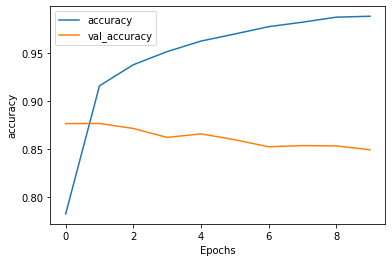

In [11]:
plot_graphs(history, 'accuracy')

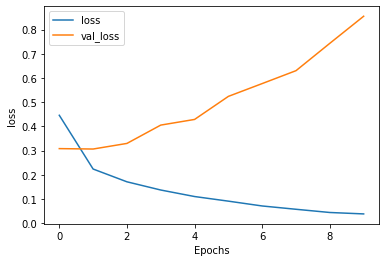

In [12]:

plot_graphs(history, 'loss')